In [2]:
import main_cpu as debeyer
from pathlib import Path
import tifffile as tf
from matplotlib.pyplot import *

In [6]:
data = Path(r'D:\UserData\JenuChacko\debeyer')/'test_bw_unsaturated'/'test_bw_unsaturated_MMStack_Pos0.ome.tif'
data = tf.imread(data)

In [14]:
import seaborn as sns
sns.set_context('notebook')

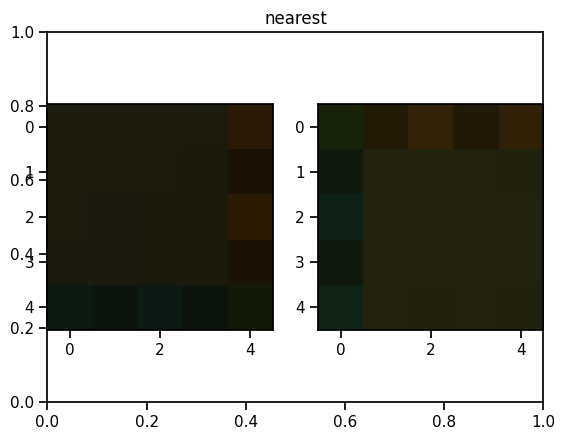

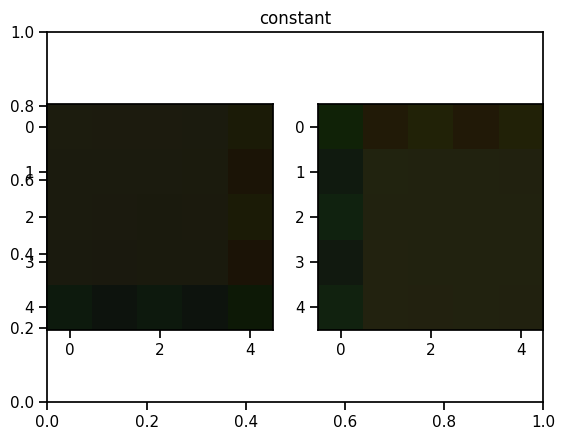

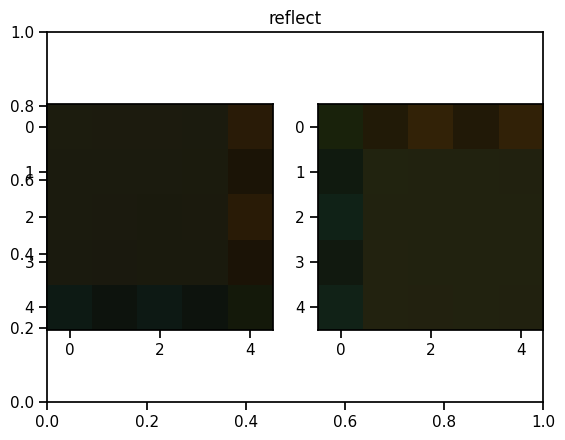

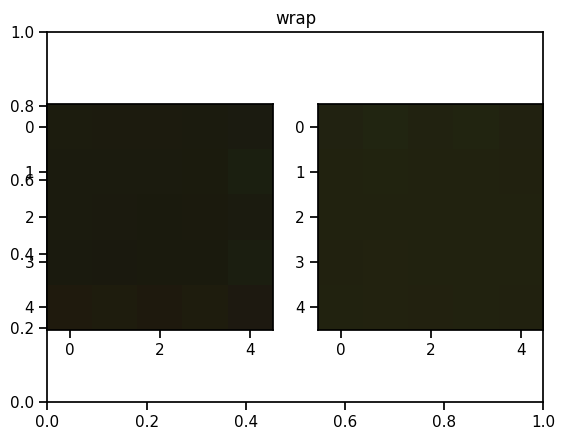

In [15]:
for methodname in ["nearest","constant","reflect",'wrap']:
    for pattern in ["GRBG"]:
        
        debayerx = debeyer.CPUDebayer(pattern=pattern,
                                        image_bit_clipmax=65535,
                                        image_dtype=np.uint16,
                                        convolution_mode=methodname)
        
        img = debayerx.debayer(data)
        img256 = ((img / 65535) * 255).astype(np.uint8) 
        figure()
        title(methodname)
        subplot(121)
        imshow(img256[-5:,-5:])
        subplot(122)
        imshow(img256[:5,:5])

In [2]:
data_dict={}
datafiles = Path(r'D:\UserData\JenuChacko\debeyer')
for tif_filename in list(datafiles.rglob(r'*.tif'))[1::2]:
    data = tf.imread(tif_filename)
    print(tif_filename,data.shape)
    data_dict.update({tif_filename.name:data})

<tifffile.TiffFile 'test_color_unsa…ack_Pos0.ome.tif'> OME series cannot handle discontiguous storage ((2200, 2688, 3) != (2200, 2688))


D:\UserData\JenuChacko\debeyer\test_bw_unsaturated\test_bw_unsaturated_MMStack_Pos0.ome.tif (2200, 2688)
D:\UserData\JenuChacko\debeyer\test_color_unsaturated\test_color_unsaturated_MMStack_Pos0.ome.tif (2200, 2688, 3)


test_bw_unsaturated_MMStack_Pos0.ome.tif
test_color_unsaturated_MMStack_Pos0.ome.tif


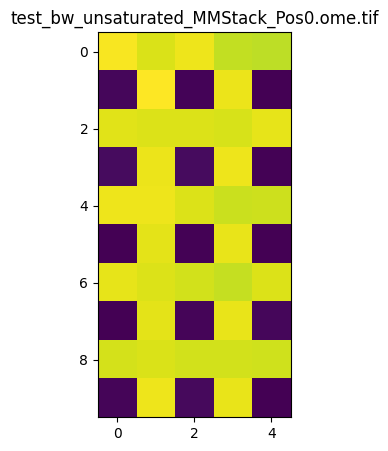

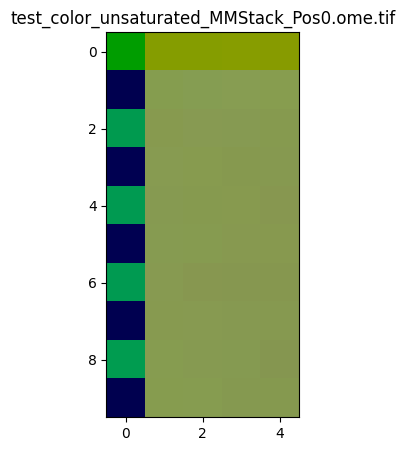

In [4]:
for filename in data_dict:
    print(filename)
    figure(figsize=[5,5])
    imshow(data_dict[filename][:10,:5,...])
    title(filename)

In [5]:
data_dict.keys()

dict_keys(['test_bw_unsaturated_MMStack_Pos0.ome.tif', 'test_color_unsaturated_MMStack_Pos0.ome.tif'])

In [6]:
data = data_dict['test_bw_unsaturated_MMStack_Pos0.ome.tif']
data.shape

(2200, 2688)

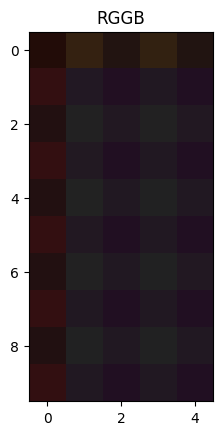

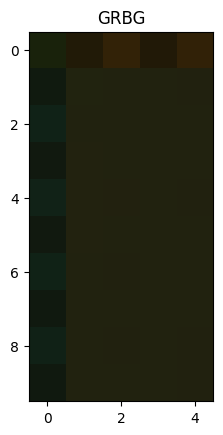

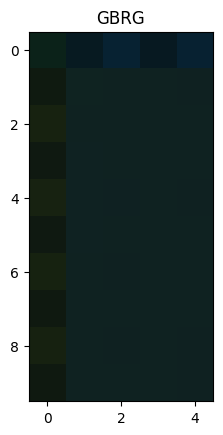

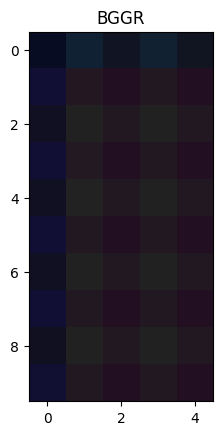

In [16]:
for pattern in ["RGGB", "GRBG", "GBRG", "BGGR"]:
    img = debeyer.process_data(data, pattern = pattern)
    img256 = ((img / 65535) * 255).astype(np.uint8) 
    figure()
    title(pattern)
    imshow(img256[:10,:5])

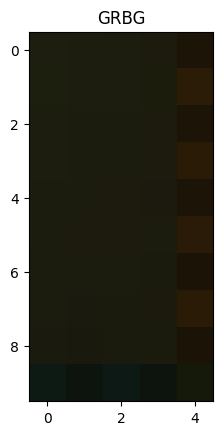

In [18]:
for pattern in ["GRBG"]:
    img = debeyer.process_data(data, pattern = pattern)
    img256 = ((img / 65535) * 255).astype(np.uint8) 
    figure()
    title(pattern)
    imshow(img256[-10:,-5:])

In [10]:
tif_filename = r'D:\UserData\JenuChacko\debeyer\test_bw_unsaturated\test_bw_unsaturated_MMStack_Pos0.ome.tif'
img = debeyer.process_image(tif_filename)

In [20]:
data[0,0]

np.uint16(12895)